In [1]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1sVeJE4zd1fmLnOgYI5QlQeaeaTGa8kIE' -O reviews.csv

"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"id" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [ ]:
import pandas as pd

df = pd.read_csv("/content/reviews.csv",  parse_dates=['date'])
df.head()

,user_id,review_id,text,votes.cool,business_id,votes.funny,stars,date,type,votes.useful
0,PUFPaY9KxDAcGqfsorJp3Q,Ya85v4eqdd6k9Od8HbQjyA,"Mr Hoagie is an institution. Walking in, it do...",0,5UmKMjUEUNdYWqANhGckJw,0,4,2012-08-01,review,0
1,Iu6AxdBYGR4A0wspR9BYHA,KPvLNJ21_4wbYNctrOwWdQ,Excellent food. Superb customer service. I mis...,0,5UmKMjUEUNdYWqANhGckJw,0,5,2014-02-13,review,0
2,auESFwWvW42h6alXgFxAXQ,fFSoGV46Yxuwbr3fHNuZig,Yes this place is a little out dated and not o...,0,5UmKMjUEUNdYWqANhGckJw,0,5,2015-10-31,review,0
3,uK8tzraOp4M5u3uYrqIBXg,Di3exaUCFNw1V4kSNW5pgA,All the food is great here. But the best thing...,0,UsFtqoBl7naz8AVUBZMjQQ,0,5,2013-11-08,review,0
4,I_47G-R2_egp7ME5u_ltew,0Lua2-PbqEQMjD9r89-asw,We checked this place out this past Monday for...,0,UsFtqoBl7naz8AVUBZMjQQ,0,3,2014-03-29,review,0


In [ ]:
df['review_id'].value_counts()

Ya85v4eqdd6k9Od8HbQjyA    1
xuN1WdoHI295FglME8c-qQ    1
aKS70YMCdnxJaS3Xl3SAJw    1
Lc1YXiEpNKOun_Y38ibURQ    1
5nAf9vdgwdgcxeRXMlEKKw    1
                         ..
rVMaATynEqXVLyWKySsKOA    1
0D509NzF5NlLpekb-RIKwg    1
zDKxJhw6zOnBG-8rM9rNNw    1
lhgC-qGcnXx1GI3iqnjc-g    1
A5MuR2Y55onnWWt2KM71IA    1
Name: review_id, Length: 27290, dtype: int64

In [ ]:
df.shape #cantidad de reviews 

(27290, 10)

In [ ]:
df.isna().sum() #no hay valores faltantes

user_id         0
review_id       0
text            0
votes.cool      0
business_id     0
votes.funny     0
stars           0
date            0
type            0
votes.useful    0
dtype: int64

# **Proceso**

Antes de realizar el análísis de NLP vamos a reducir el conjunto de datos teniendo en cuenta los business con más de 100 comentarios (por razones de cálculo-optimización de recursos).

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [ ]:
df_copy=df.copy()

In [ ]:
df_copy=df_copy.drop(['type','review_id'], axis=1)

In [ ]:
df_business=df_copy.groupby('business_id').agg(num_comentarios=('text','count')).reset_index()
df_business.sort_values(by='num_comentarios', ascending=False).reset_index(drop=True).head(30)

,business_id,num_comentarios
0,3Q0QQPnHcJuX1DLCL9G9Cg,1068
1,mpDxBBGywUE6GRRKja3sBA,527
2,NeUf9FyCCIN4MEseNyqkXQ,387
3,jTGQUWGIVvL-aY03C5BEmw,292
4,NTfUFk8GyOLL1uPbEO-pVg,250
5,XmdTkxKyJd7TuDLoiic1kg,249
6,vgXE1I7c9ElcfYyZfQiN1Q,243
7,2X5G4Ujq0s4Wfn4TC7gX0g,243
8,2SwC8wqpZC4B9iFVTgYT9A,239
9,rgmptwPbBH1wLpiBHcbIhA,221


In [ ]:
business=df_business[df_business.num_comentarios>=100][['business_id']]
business.reset_index(drop=True)

,business_id
0,--UE_y6auTgq3FXlvUMkbw
1,2Igiyhi82R8_QaaPplRmCw
2,2SwC8wqpZC4B9iFVTgYT9A
3,2X5G4Ujq0s4Wfn4TC7gX0g
4,2_0P2AmSSFtPgddio0MgYA
5,3Q0QQPnHcJuX1DLCL9G9Cg
6,4CPrhBc4Ado90fj7PG6jrA
7,4nFqPL-glgDm9v7bZptskQ
8,6-rJjW6ITl5o_FliiNgZRA
9,93UCt9OgWYmypZCpXtUu8g


Con el criterio especificado estamos abarcando un total de 47 negocios.



In [ ]:
#b=df_copy
df_copy=df_copy.loc[df_copy['business_id'].isin(business['business_id'])].reset_index(drop=True)
df_copy

,user_id,text,votes.cool,business_id,votes.funny,stars,date,votes.useful
0,IbvOxKSps_K5wa3a2_jc-Q,"Horrible beer, horrible service, horrible menu",0,McikHxxEqZ2X0joaRNKlaw,0,1,2007-09-11,0
1,vNm0EuNWJ0GZwQifrxDWAQ,SUMMARY:\nIf I was in the area and no one had ...,0,McikHxxEqZ2X0joaRNKlaw,0,2,2008-09-15,0
2,NCYse908q22pjK4SrmDA5g,I am a big fan of Rock Bottom.\nThere are seve...,0,McikHxxEqZ2X0joaRNKlaw,0,5,2008-09-23,0
3,-J9FWRI3Wj2U9eUULJPNFQ,I thought this place was pretty decent. My fri...,1,McikHxxEqZ2X0joaRNKlaw,0,3,2008-12-03,2
4,LhgQq1x4n9ardg1PFo8vgg,Microbrewed beers are only a plus to me when t...,0,McikHxxEqZ2X0joaRNKlaw,0,2,2008-12-03,0
...,...,...,...,...,...,...,...,...
9094,EhEP8nAcdTdvbBw0EQvymA,Had the tilapia burrito. They were really good...,0,p_HFt0I92MHDNPWvdtyEBA,0,4,2015-11-03,0
9095,8bFmKK-jCBkP-rFv4ke5JQ,The al pastor tacos were SO delicious!! Aweso...,0,p_HFt0I92MHDNPWvdtyEBA,0,5,2015-11-22,0
9096,MW1mJKIilg6iZH7IihrqxA,I took my daughter who was visiting from DC an...,0,p_HFt0I92MHDNPWvdtyEBA,0,5,2015-11-30,0
9097,6AyWHZ4jFAjff1X7rXd_NQ,Not impressed at all- would definitely not rec...,0,p_HFt0I92MHDNPWvdtyEBA,0,1,2015-11-30,0


In [ ]:
df_copy.shape

(9099, 8)

Además, vamos a tener 9099 reviews para nuestro análisis lo cual es un número aceptable.

### Preprocesamiento: 
Limpieza del texto (variable 'text')

La siguiente función sirve para expandir contracciones típicas del inglés (ej. simple: “can’t” -> “can not”, hay algunas ambigüas que dependen de la oración)

In [ ]:
!pip install contractions # instalamos
import contractions # importamos

# print(contractions.fix("You've")) # algunos ejemplos
# print(contractions.fix("Homer's car"))
# print(contractions.fix("Wouldn't ain't won't"))

# Definimos una funcion anonima que al pasarle un argumento devuelve el resultado de aplicarle la funcion anterior a este mismo argumento
round0 = lambda x: contractions.fix(x)

# Dataframe que resulta de aplicarle a las columnas la funcion de limpieza
#data_clean = pd.DataFrame(df.text.apply(round0))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 287 kB 32.3 MB/s 
     |████████████████████████████████| 106 kB 75.9 MB/s 


In [ ]:
df_copy["text"] = df_copy["text"].apply(round0)

In [ ]:
#además de eliminar stop words, elimina signos de puntuación y números, convierte todo a minúsculas y lematiza
def clean_text(text):
  clean_text = []
  for token in nlp(text):
    if not token.is_stop and not token.is_punct and token.is_alpha:
      clean_text.append(token.lemma_.lower())

  return " ".join(clean_text)

In [ ]:
df_copy['text'][0]+'2'+' 20'

'Horrible beer, horrible service, horrible menu2 20'

In [ ]:
clean_text(df_copy['text'][0])

'horrible beer horrible service horrible menu'

In [ ]:
%%time
df_copy["text"] = df_copy["text"].apply(clean_text)


CPU times: user 3min 8s, sys: 1.35 s, total: 3min 9s
Wall time: 3min 15s


In [ ]:
df_copy.head()

,user_id,text,votes.cool,business_id,votes.funny,stars,date,votes.useful
0,IbvOxKSps_K5wa3a2_jc-Q,horrible beer horrible service horrible menu,0,McikHxxEqZ2X0joaRNKlaw,0,1,2007-09-11,0
1,vNm0EuNWJ0GZwQifrxDWAQ,summary area well suggestion come beer appetiz...,0,McikHxxEqZ2X0joaRNKlaw,0,2,2008-09-15,0
2,NCYse908q22pjK4SrmDA5g,big fan rock dish money appetizer seared ahi s...,0,McikHxxEqZ2X0joaRNKlaw,0,5,2008-09-23,0
3,-J9FWRI3Wj2U9eUULJPNFQ,think place pretty decent friend reel thanksgi...,1,McikHxxEqZ2X0joaRNKlaw,0,3,2008-12-03,2
4,LhgQq1x4n9ardg1PFo8vgg,microbrewe beer plus well beer drink waitress ...,0,McikHxxEqZ2X0joaRNKlaw,0,2,2008-12-03,0


##Extracción de la información

###NOUNS

Vamos a generar una columna con los sustantivos 'NOUN' de cada comentario

In [ ]:
def get_nouns(text):
  doc = nlp(text)
  nouns = []
  for token in doc:
    if token.pos_ == "NOUN":
      nouns.append(token.text)
  return nouns

In [ ]:
%%time
df_copy['NOUNS'] = df_copy['text'].apply(get_nouns)

CPU times: user 1min 33s, sys: 387 ms, total: 1min 33s
Wall time: 1min 39s


In [ ]:
df_copy.sample(10)

,user_id,text,votes.cool,business_id,votes.funny,stars,date,votes.useful,NOUNS
8943,l6OkKiYtyZhSMfSa8LKncw,want sell upgrade insurance rental coverage pu...,0,eThu9hCL8NOjOxswQ-cFSg,0,1,2015-01-21,1,"[insurance, rental, coverage, push, time, scra..."
2869,l5jX4ZBw37dzdtkA7QxkDw,bummer close end january renovation,0,sxeuOMBRllOHXJTaUlI9kQ,0,4,2011-12-05,0,"[bummer, end, renovation]"
4298,qUuKf7ei533aolmIpwezuw,hidden gem old area downtown old victorian nei...,1,ePP0Eqz8JKSbtdt2phiB4A,0,4,2010-04-02,1,"[gem, area, downtown, neighborhood, downtown, ..."
1459,Qy7WcGATORm1U2kwmC153Q,maybe expectation high pastrami sandwich think...,0,NeUf9FyCCIN4MEseNyqkXQ,0,2,2011-07-28,1,"[sandwich, flavor, vinegar, pepper, sauce]"
6000,MBdvFm0FUmLFVuqspays5g,need occasion day night special absolute class...,0,CChwRoYVXA3QZulS8a6xOQ,0,5,2014-10-23,0,"[occasion, day, night, class, minute, seat, st..."
7336,gRKiX_9JUqi4Jy8KjtsehA,like clt big airport parking cost day crazy ch...,0,3Q0QQPnHcJuX1DLCL9G9Cg,0,4,2011-09-15,2,"[airport, parking, day, food, store, rock, cha..."
4821,7_8OfkjdBhiftN8XoMaOKA,follow item great artichoke crab dip mac chick...,0,ym9QwkmB5ZKTyj7q5huTDw,0,5,2015-10-02,0,"[item, crab, bean, tender, kids, sundae, dessert]"
2395,J6bF6kHsx0_kQNURas8-Cw,move area search good place pho stop pleasantl...,0,dxCqGkhtXq-9fYEsX7Mf6Q,0,5,2014-03-09,0,"[area, search, place, pho, eggroll, hand, good..."
7669,rSAweZTWIlRScQexpEODSA,expectation arrange door door wheelchair servi...,0,3Q0QQPnHcJuX1DLCL9G9Cg,0,1,2013-10-16,0,"[expectation, arrange, door, door, wheelchair,..."
7455,wRyLeAg0R9WMFg3gqpnX-Q,time charlotte airport hear story big yes hear...,1,3Q0QQPnHcJuX1DLCL9G9Cg,0,2,2012-07-09,0,"[airport, story, notice, gas, station, end, ga..."


In [ ]:
df_copy['NOUNS'][1] #se repite food, por ejemplo

['area',
 'suggestion',
 'beer',
 'appetizer',
 'beer',
 'cheese',
 'portion',
 'appetizer',
 'sampler',
 'multi',
 'story',
 'way',
 'food',
 'order',
 'rib',
 'service',
 'drink',
 'water',
 'refill',
 'lot',
 'food',
 'choice',
 'lot',
 'drink',
 'choice',
 'beer',
 'wine',
 'drink',
 'guess',
 'tell',
 'place',
 'food',
 'stand',
 'way',
 'beer',
 'appetizer',
 'course',
 'brewery',
 'kind',
 'night',
 'place',
 'bar',
 'food',
 'expectation',
 'low']

###NOUN CHUNKS

Vamos a generar una columna con los sustantivos 'NOUN CHUNKS' de cada comentario

In [ ]:
def get_noun_chunks(text:str):
  doc = nlp(text)
  return [nc for nc in doc.noun_chunks]

In [ ]:
%%time
df_copy['NC'] = df_copy['text'].apply(get_noun_chunks)

CPU times: user 1min 28s, sys: 501 ms, total: 1min 28s
Wall time: 1min 28s


In [ ]:
#df_copy['text'][0]
df_copy.sample(5)

,user_id,text,votes.cool,business_id,votes.funny,stars,date,votes.useful,NOUNS,NC
5129,N5UK8du9JapFaE05sNdI4Q,come harlem southern soul food probably bit sk...,1,mpDxBBGywUE6GRRKja3sBA,4,4,2012-09-05,1,"[soul, food, bit, thing, food, food, mert, ser...","[(harlem, southern, soul, food), (probably, bi..."
5540,SEVMFgih_O-2gN0ZOYlNbQ,eat mimosa grill restaurant week year love off...,0,NTfUFk8GyOLL1uPbEO-pVg,0,4,2012-01-26,1,"[week, year, love, option, queens, feast, menu...","[(mimosa, grill, restaurant), (week, year, lov..."
3156,GLbHqZOByq4H67S6q5T3-A,good gnocchi italy,0,6-rJjW6ITl5o_FliiNgZRA,0,4,2012-08-11,1,[],"[(good, gnocchi, italy)]"
1415,gM0Uvv2YbbA-i3C3U-oYkQ,french fry sandwich time pa sure expect send m...,0,NeUf9FyCCIN4MEseNyqkXQ,0,4,2010-08-06,0,"[fry, sandwich, time, market, sandwich, world,...","[(french, fry, sandwich, time, pa), (market, s..."
6613,-3akdU5UTDn6dwiTCO2cAw,sushi great price affordable service expect te...,0,MMNBgMQCdwyVoNaHg0h_QA,0,4,2012-03-27,1,"[price, service, thing, malaya, fact, area, jo...","[(sushi, great, price, affordable, service), (..."


###NER

Agregamos una columna con las entidades (NER)

In [ ]:
def get_entities(text:str):
  doc=nlp(text)
  ents = []
  if doc.ents: 
    for ent in doc.ents:
      ents.append(ent.text)
      
  return ents

In [ ]:
df_copy["NER"] = df_copy["text"].apply(get_entities)

In [ ]:
df_copy.head(5)

,user_id,text,votes.cool,business_id,votes.funny,stars,date,votes.useful,NOUNS,NC,NER
0,IbvOxKSps_K5wa3a2_jc-Q,horrible beer horrible service horrible menu,0,McikHxxEqZ2X0joaRNKlaw,0,1,2007-09-11,0,"[beer, service, menu]","[(horrible, beer, horrible, service, horrible,...",[]
1,vNm0EuNWJ0GZwQifrxDWAQ,summary area well suggestion come beer appetiz...,0,McikHxxEqZ2X0joaRNKlaw,0,2,2008-09-15,0,"[area, suggestion, beer, appetizer, beer, chee...","[(summary, area, well, suggestion), (beer, app...","[monday, night]"
2,NCYse908q22pjK4SrmDA5g,big fan rock dish money appetizer seared ahi s...,0,McikHxxEqZ2X0joaRNKlaw,0,5,2008-09-23,0,"[fan, rock, dish, money, appetizer, spinach, d...","[(big, fan, rock, dish, money, appetizer), (sp...","[half menu good, grumpy andy, year ago]"
3,-J9FWRI3Wj2U9eUULJPNFQ,think place pretty decent friend reel thanksgi...,1,McikHxxEqZ2X0joaRNKlaw,0,3,2008-12-03,2,"[place, friend, dinner, order, tasty, way, dre...","[(place), (pretty, decent, friend), (thanksgiv...",[]
4,LhgQq1x4n9ardg1PFo8vgg,microbrewe beer plus well beer drink waitress ...,0,McikHxxEqZ2X0joaRNKlaw,0,2,2008-12-03,0,"[beer, beer, drink, waitress, beer, kind, coor...","[(microbrewe, beer), (well, beer, drink), (upr...",[half]


##Visualizaciones: primer acercamiento

###Wordcloud:



Instalamos la aplicacion

In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
word_cloud = WordCloud(collocations = False,
                       background_color = 'white',
                       width = 800, height = 800,
                       stopwords = nlp.Defaults.stop_words, 
                       ).generate(str(df_copy["text"].values))

####Reviews en general

Vamos a hacer una nube de palabra con los textos de los comentarios

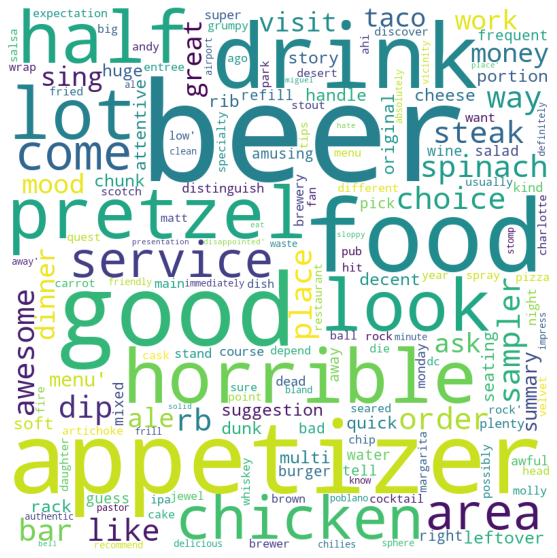

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

####NOUN CHUNKS

Vamos a hacer una nube de palabras sobre los NOUNS CHUNKS



In [ ]:
df_explode_NC = df_copy.explode('NC')

In [ ]:
df_explode_NC.head(5)

,user_id,text,votes.cool,business_id,votes.funny,stars,date,votes.useful,NOUNS,NC,NER
0,IbvOxKSps_K5wa3a2_jc-Q,horrible beer horrible service horrible menu,0,McikHxxEqZ2X0joaRNKlaw,0,1,2007-09-11,0,"[beer, service, menu]","(horrible, beer, horrible, service, horrible, ...",[]
1,vNm0EuNWJ0GZwQifrxDWAQ,summary area well suggestion come beer appetiz...,0,McikHxxEqZ2X0joaRNKlaw,0,2,2008-09-15,0,"[area, suggestion, beer, appetizer, beer, chee...","(summary, area, well, suggestion)","[monday, night]"
1,vNm0EuNWJ0GZwQifrxDWAQ,summary area well suggestion come beer appetiz...,0,McikHxxEqZ2X0joaRNKlaw,0,2,2008-09-15,0,"[area, suggestion, beer, appetizer, beer, chee...","(beer, appetizer, good, decent, beer, original...","[monday, night]"
1,vNm0EuNWJ0GZwQifrxDWAQ,summary area well suggestion come beer appetiz...,0,McikHxxEqZ2X0joaRNKlaw,0,2,2008-09-15,0,"[area, suggestion, beer, appetizer, beer, chee...",(food),"[monday, night]"
1,vNm0EuNWJ0GZwQifrxDWAQ,summary area well suggestion come beer appetiz...,0,McikHxxEqZ2X0joaRNKlaw,0,2,2008-09-15,0,"[area, suggestion, beer, appetizer, beer, chee...","(half, order)","[monday, night]"


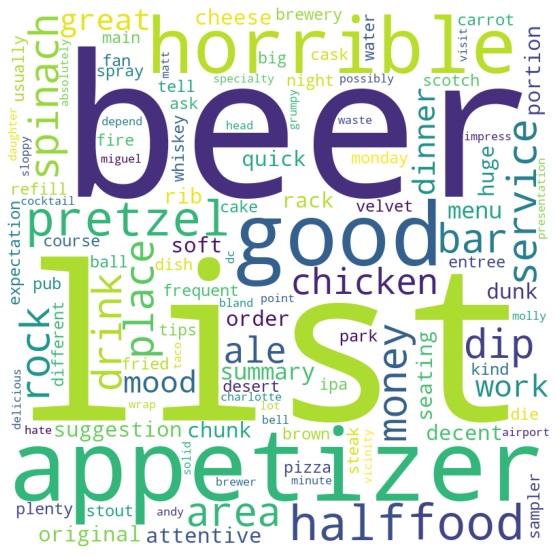

In [ ]:
#nube sin usar explode
word_cloud_nc = WordCloud(collocations = False,
                       background_color = 'white',
                       width = 800, height = 800,
                       stopwords = nlp.Defaults.stop_words, 
                       ).generate(str(df_copy["NC"].values))

plt.figure(figsize=(10,10))
plt.imshow(word_cloud_nc)
plt.axis("off")
plt.show()

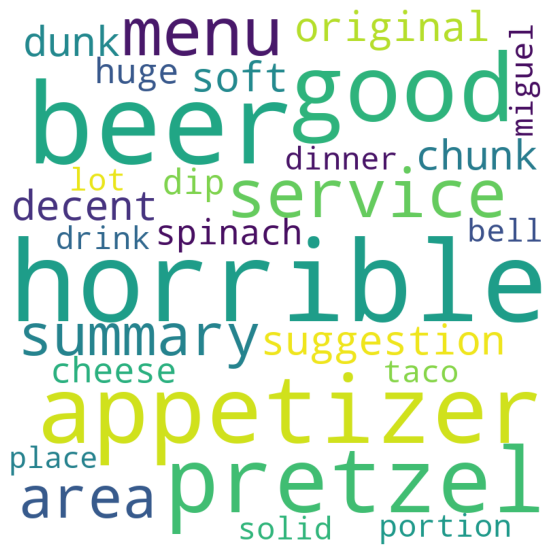

In [ ]:
#nube de palabras aplicando explode a la columna NC (lo cual no da contexto a las palabras)
word_cloud_nc_1 = WordCloud(collocations = False,
                       background_color = 'white',
                       width = 800, height = 800,
                       stopwords = nlp.Defaults.stop_words, 
                       ).generate(str(df_explode_NC["NC"].values))

plt.figure(figsize=(10,10))
plt.imshow(word_cloud_nc_1)
plt.axis("off")
plt.show()

###Análisis NER según las calificaciones de los business

Utilizamos la columna NER para analizar las entidades más nombradas para calificaciones (stars) mayores a 3

In [ ]:
df_copy.stars.unique()

array([1, 2, 5, 3, 4])

In [ ]:
df_ner=df_copy[df_copy['stars'] >= 3]


In [ ]:
pd.options.display.max_colwidth = 10000
df_ner.head(5)

,user_id,text,votes.cool,business_id,votes.funny,stars,date,votes.useful,NOUNS,NC,NER
2,NCYse908q22pjK4SrmDA5g,big fan rock dish money appetizer seared ahi spinach artichoke dip entree fire steak pub tips chicken fried chicken desert carrot cake die bar food pizza ball park pretzel spray brown ale half menu good half great beer good ask sampler usually velvet cask ask look different scotch ale ipa whiskey stout specialty depend mood brewer matt mood grumpy andy work sure molly great cocktail area head sing sing dinner wrap work year ago point hit rb possibly charlotte rock,0,McikHxxEqZ2X0joaRNKlaw,0,5,2008-09-23,0,"[fan, rock, dish, money, appetizer, spinach, dip, fire, steak, pub, tips, chicken, chicken, desert, carrot, cake, die, bar, food, pizza, half, menu, beer, ask, sampler, velvet, cask, scotch, ale, whiskey, specialty, depend, mood, work, cocktail, area, head, dinner, wrap, work, year, point, charlotte, rock]","[(big, fan, rock, dish, money, appetizer), (spinach), (dip, entree, fire, steak, pub, tips, chicken, fried, chicken, desert, carrot, cake, die, bar, food, pizza, ball, park, pretzel, spray, brown, ale, half), (good, half, great, beer), (good, ask, sampler), (usually, velvet, cask), (different, scotch, ale, ipa, whiskey, stout, specialty, depend, mood, brewer, matt, mood, grumpy, andy, work), (molly, great, cocktail, area, head), (dinner, wrap, work), (point), (possibly, charlotte, rock)]","[half menu good, grumpy andy, year ago]"
3,-J9FWRI3Wj2U9eUULJPNFQ,think place pretty decent friend reel thanksgive dinner order salad huge tasty like salad slather way dress friend slathered dig order chip guacamole guac pretty good friend enjoy beer enjoy coke know lame yeah bad good okay,1,McikHxxEqZ2X0joaRNKlaw,0,3,2008-12-03,2,"[place, friend, dinner, order, tasty, way, dress, friend, order, chip, friend, beer, enjoy]","[(place), (pretty, decent, friend), (thanksgive, dinner, order), (huge, tasty), (slather, way, dress, friend), (dig, order, chip, guacamole), (pretty, good, friend), (beer, enjoy, coke)]",[]
5,WMTm9HHRA3EewoxTX1Gleg,great ale house city certainly bad like food try beer ok far beer go large portion friendly staff,0,McikHxxEqZ2X0joaRNKlaw,0,3,2009-06-24,0,"[ale, city, food, beer, beer, portion, staff]","[(great, ale, house, city), (food), (beer), (ok, far, beer), (large, portion, friendly, staff)]",[great ale house city]
7,fFoRIzbwpMiv3BvfdtdlXQ,everytime come stick nachos add chicken add guac dissappointe sit bar grab drink eat nachos bar pool table plenty flatscreens rock chain well chain area pass chili friday come rock instead oh typically walk target work nachos,2,McikHxxEqZ2X0joaRNKlaw,1,3,2009-12-17,1,"[stick, nachos, chicken, bar, grab, drink, bar, pool, table, plenty, rock, chain, chain, chili, rock, target, work, nachos]","[(everytime), (stick, nachos), (chicken), (guac, dissappointe, sit, bar, grab, drink), (nachos, bar, pool, table), (plenty), (rock, chain, well, chain, area), (chili), (rock), (target, work, nachos)]",[friday]
8,FyCBkNXwoI_6X6apbslg4g,review surprised lack love husband eat night ago like lot start drink get house brew portland wheat say good beer get mixed drink red rock tasty get burger cover mozzarella cheese get mahi sandwich great fry salad good skimping portion ton thing menu look forward try usually dessert people end meal share triple chocolate stout cheesecake resist beer cheesecake come food service great penguins game tv bar set live music game seriously like think place change well review year ago,0,McikHxxEqZ2X0joaRNKlaw,0,4,2010-04-02,1,"[lack, love, husband, night, lot, start, drink, wheat, beer, drink, tasty, cheese, sandwich, fry, skimping, portion, ton, thing, people, meal, share, chocolate, cheesecake, resist, beer, cheesecake, food, service, penguins, game, tv, bar, music, game, place, review, year]","[(surprised, lack, love, husband), (lot), (house, brew, portland, wheat), (good, beer), (mixed, drink, red, rock, tasty), (burger), (mozzarella, cheese), (mahi, sa

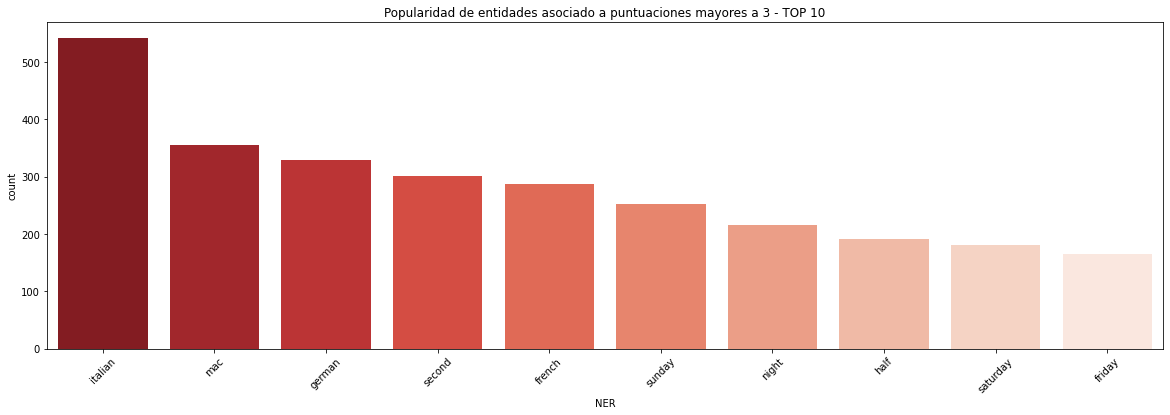

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,6))
sns.countplot(x=df_ner.explode("NER").NER, 
              order=df_ner.explode("NER").NER.value_counts().index[:10],
              palette='Reds_r')
plt.title("Popularidad de entidades asociado a puntuaciones mayores a 3 - TOP 10")
plt.xticks(rotation=45)
plt.show()

In [ ]:
df_ner.explode('NER').NER.value_counts()

italian                                   542
mac                                       356
german                                    329
second                                    302
french                                    287
                                         ... 
favorite italian restaurant pittsburgh      1
winter night                                1
definitely great date night                 1
soba big burrito asian fusion concern       1
al pastor chilies                           1
Name: NER, Length: 3543, dtype: int64

##Análisis de sentimientos: TextBlob

Vamos a realizar un analisis de TextBlob de sentimiento de los comentarios y ordenarlos entre Positivos, Neutros y Negativos.

In [ ]:
from textblob import TextBlob

Tomamos para definir la banda de nuetro entre -0.15 y 0.15

In [ ]:
def get_sentiment(text):
  sent = TextBlob(text).sentiment.polarity

  if sent > 0.15:
    return "POS"
  
  if sent >= -0.15 and sent <= 0.15:
    return "NEU"

  if sent < -0.15:
    return "NEG"

In [ ]:
%%time
df_copy['SENT'] = df_copy['text'].apply(get_sentiment)

CPU times: user 4.8 s, sys: 21.9 ms, total: 4.82 s
Wall time: 5.51 s


In [ ]:
df_copy.head(3)

,user_id,text,votes.cool,business_id,votes.funny,stars,date,votes.useful,NOUNS,NC,NER,SENT
0,IbvOxKSps_K5wa3a2_jc-Q,horrible beer horrible service horrible menu,0,McikHxxEqZ2X0joaRNKlaw,0,1,2007-09-11,0,"[beer, service, menu]","[(horrible, beer, horrible, service, horrible, menu)]",[],NEG
1,vNm0EuNWJ0GZwQifrxDWAQ,summary area well suggestion come beer appetizer good decent beer original pretzel appetizer chunk soft pretzel dunk spinach cheese dip huge portion leftover rb appetizer sampler multi story way food handle half order rib look like rack attentive service quick seating frequent drink water refill amusing bad lot food choice burger steak chicken salad lot drink choice beer wine mixed drink guess see good take pick awesome tell right away distinguish place food super awesome awful stand way well beer appetizer well main course plenty brewery kind dead monday night place come want bar food expectation low,0,McikHxxEqZ2X0joaRNKlaw,0,2,2008-09-15,0,"[area, suggestion, beer, appetizer, beer, cheese, portion, appetizer, sampler, multi, story, way, food, order, rib, service, drink, water, refill, lot, food, choice, lot, drink, choice, beer, wine, drink, guess, tell, place, food, stand, way, beer, appetizer, course, brewery, kind, night, place, bar, food, expectation, low]","[(summary, area, well, suggestion), (beer, appetizer, good, decent, beer, original, pretzel, appetizer, chunk, soft, pretzel, dunk, spinach, cheese, dip, huge, portion), (food), (half, order), (rib), (rack, attentive, service, quick, seating, frequent, drink, water), (refill), (tell), (beer, appetizer, well, main, course), (plenty, brewery, kind), (monday, night, place), (bar, food, expectation)]","[monday, night]",POS
2,NCYse908q22pjK4SrmDA5g,big fan rock dish money appetizer seared ahi spinach artichoke dip entree fire steak pub tips chicken fried chicken desert carrot cake die bar food pizza ball park pretzel spray brown ale half menu good half great beer good ask sampler usually velvet cask ask look different scotch ale ipa whiskey stout specialty depend mood brewer matt mood grumpy andy work sure molly great cocktail area head sing sing dinner wrap work year ago point hit rb possibly charlotte rock,0,McikHxxEqZ2X0joaRNKlaw,0,5,2008-09-23,0,"[fan, rock, dish, money, appetizer, spinach, dip, fire, steak, pub, tips, chicken, chicken, desert, carrot, cake, die, bar, food, pizza, half, menu, beer, ask, sampler, velvet, cask, scotch, ale, whiskey, specialty, depend, mood, work, cocktail, area, head, dinner, wrap, work, year, point, charlotte, rock]","[(big, fan, rock, dish, money, appetizer), (spinach), (dip, entree, fire, steak, pub, tips, chicken, fried, chicken, desert, carrot, cake, die, bar, food, pizza, ball, park, pretzel, spray, brown, ale, half), (good, half, great, beer), (good, ask, sampler), (usually, velvet, cask), (different, scotch, ale, ipa, whiskey, stout, specialty, depend, mood, brewer, matt, mood, grumpy, andy, work), (molly, great, cocktail, area, head), (dinner, wrap, work), (point), (possibly, charlotte, rock)]","[half menu good, grumpy andy, year ago]",NEU


Realizamos un conteo de la cantidad de comentarios de cada tipo

In [ ]:
df_copy.SENT.value_counts()

POS    6678
NEU    2107
NEG     314
Name: SENT, dtype: int64

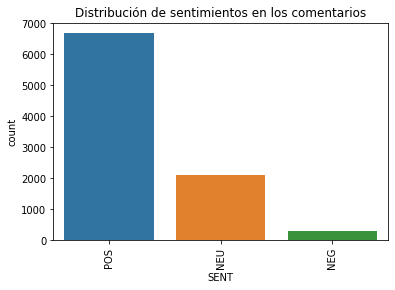

In [ ]:
import seaborn as sns
ax = sns.countplot(x=df_copy['SENT'], order=df_copy['SENT'].value_counts().index)
plt.xticks(rotation=90)
plt.title(f'Distribución de sentimientos en los comentarios')
plt.show()

###NOUNS
Analisis de sentimientos respecto de los NOUNS(sustantivos)

In [ ]:
noun_sentiments = df_copy.explode("NOUNS").groupby(["NOUNS", "SENT"], as_index=False).agg({"text": "count"})


In [ ]:
# df_explode = df_copy.explode('NOUNS')

**Veamos cuales son los 10 NOUNS más nombrados asociados a sentimientos negativos**

In [ ]:
noun_sentiments[noun_sentiments.SENT == "NEG"].sort_values(by="text", ascending=False).nlargest(10,'text')


,NOUNS,SENT,text
5018,food,NEG,181
11180,service,NEG,113
12913,time,NEG,109
8573,order,NEG,87
9314,place,NEG,84
238,airport,NEG,63
9043,people,NEG,61
4537,experience,NEG,53
1874,car,NEG,49
12507,table,NEG,47


In [ ]:
df_explode = df_copy.explode('NOUNS')

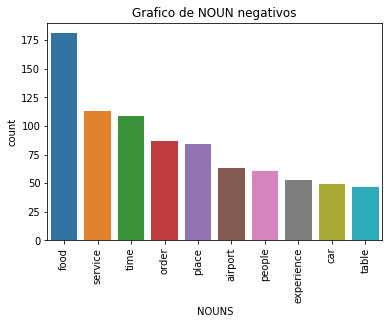

In [ ]:
ax = sns.countplot(x=df_explode[df_explode.SENT == 'NEG'].NOUNS, order= df_explode[df_explode.SENT == 'NEG'].NOUNS.value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.title(f'Grafico de NOUN negativos')
plt.show()

**Veamos cuales son los 10 NOUNS más nombrados asociados a sentimientos positivos.**

In [ ]:
noun_sentiments[noun_sentiments.SENT == "POS"].sort_values(by="text", ascending=False).nlargest(10, 'text')

,NOUNS,SENT,text
5020,food,POS,4467
9316,place,POS,3523
12915,time,POS,2388
11182,service,POS,2265
8575,order,POS,2206
10446,restaurant,POS,1858
1018,beer,POS,1561
2215,cheese,POS,1278
7271,love,POS,1278
7655,menu,POS,1200


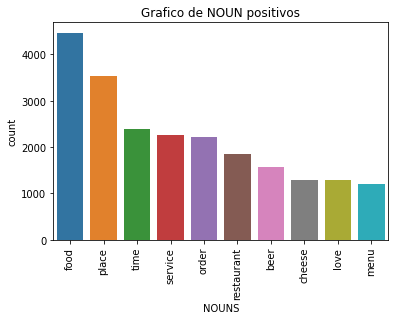

In [ ]:
ax = sns.countplot(x=df_explode[df_explode.SENT == 'POS'].NOUNS, order= df_explode[df_explode.SENT == 'POS'].NOUNS.value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.title(f'Grafico de NOUN positivos')
plt.show()

### Según los 10 business con más comentarios

Análisis de sentimientos de los 10 Business con más comentarios

In [ ]:
df_copy.business_id.value_counts().iloc[:10]

3Q0QQPnHcJuX1DLCL9G9Cg    1068
mpDxBBGywUE6GRRKja3sBA     527
NeUf9FyCCIN4MEseNyqkXQ     387
jTGQUWGIVvL-aY03C5BEmw     292
NTfUFk8GyOLL1uPbEO-pVg     250
XmdTkxKyJd7TuDLoiic1kg     249
2X5G4Ujq0s4Wfn4TC7gX0g     243
vgXE1I7c9ElcfYyZfQiN1Q     243
2SwC8wqpZC4B9iFVTgYT9A     239
rgmptwPbBH1wLpiBHcbIhA     221
Name: business_id, dtype: int64

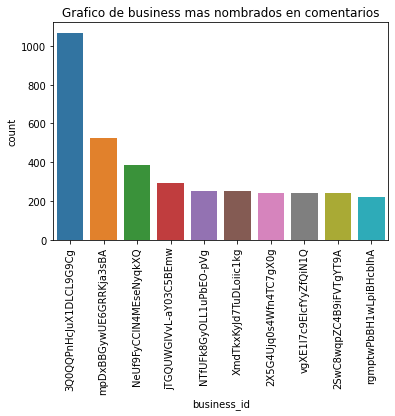

In [ ]:
ax = sns.countplot(x = df_copy.business_id, order= df_copy.business_id.value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.title(f'Grafico de business mas nombrados en comentarios')
plt.show()

**Graficamos los 10 business con mayor cantidad SENT NEG**

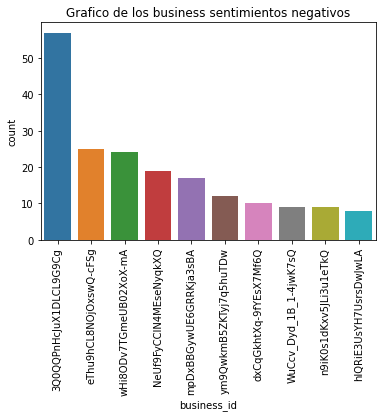

In [ ]:
ax = sns.countplot(x=df_copy[df_copy.SENT == 'NEG'].business_id, order= df_copy[df_copy.SENT == 'NEG'].business_id.value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.title(f'Grafico de los business sentimientos negativos')
plt.show()

**Graficamos los 10 business con mayor cantidad SENT POS**

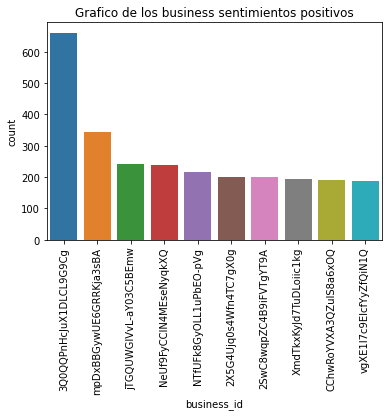

In [ ]:
ax = sns.countplot(x=df_copy[df_copy.SENT == 'POS'].business_id, order= df_copy[df_copy.SENT == 'POS'].business_id.value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.title(f'Grafico de los business sentimientos positivos')
plt.show()

###Analizamos el negocio con más comentarios

Análisis de sentimientos para el business que tiene mayor cantidad de comentarios

In [ ]:
df_copy[df_copy['business_id']=='3Q0QQPnHcJuX1DLCL9G9Cg'].SENT.value_counts()

POS    661
NEU    350
NEG     57
Name: SENT, dtype: int64

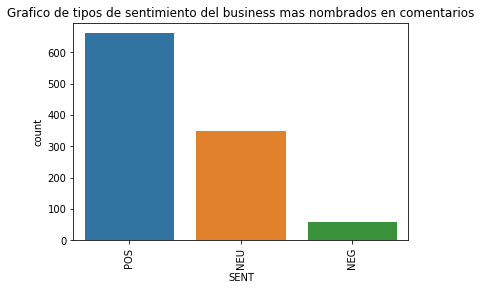

In [ ]:
ax = sns.countplot(x = df_copy[df_copy['business_id']=='3Q0QQPnHcJuX1DLCL9G9Cg'].SENT, order=df_copy[df_copy['business_id']=='3Q0QQPnHcJuX1DLCL9G9Cg'].SENT.value_counts().index)
plt.xticks(rotation=90)
plt.title(f'Grafico de tipos de sentimiento del business mas nombrados en comentarios')
plt.show()

####Wordcloud: usando NC

In [ ]:
word_cloud_business_pos = WordCloud(collocations = False,
                       background_color = 'white',
                       width = 800, height = 800,
                       stopwords = nlp.Defaults.stop_words, 
                       ).generate(str(df_copy[df_copy['business_id']=='3Q0QQPnHcJuX1DLCL9G9Cg'][df_copy['SENT'] == 'POS']['NC'].values))
                      

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


#####Sentimientos postivos

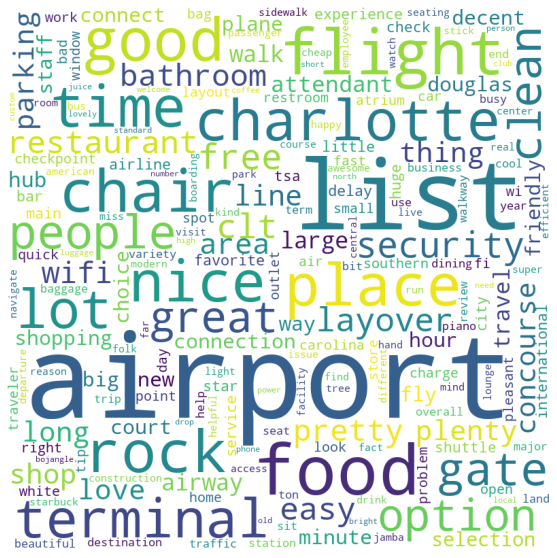

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(word_cloud_business_pos)
plt.axis("off")
plt.show()

#####Sentimientos negativos

In [ ]:
word_cloud_business_NEG = WordCloud(collocations = False,
                       background_color = 'white',
                       width = 800, height = 800,
                       stopwords = nlp.Defaults.stop_words, 
                       ).generate(str(df_copy[df_copy['business_id']=='3Q0QQPnHcJuX1DLCL9G9Cg'][df_copy['SENT'] == 'NEG']['NC'].values))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


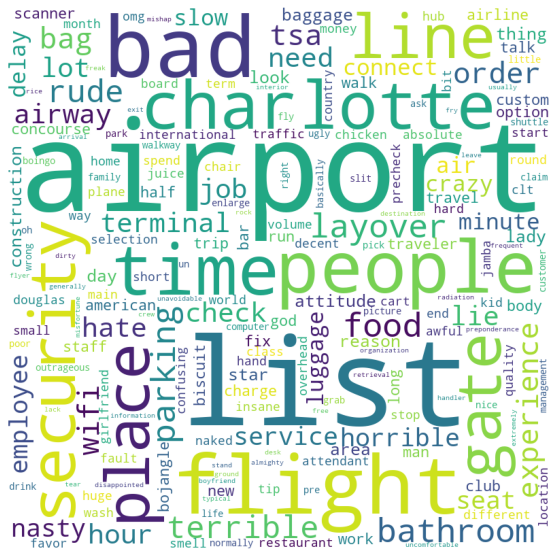

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(word_cloud_business_NEG)
plt.axis("off")
plt.show()

### Análisis temporal de sentimientos

Analizamos la evolución temporal de los sentimientos para los 10 negocios con más comentarios

In [ ]:
df_copy.date.dt.year.head()

0    2007
1    2008
2    2008
3    2008
4    2008
Name: date, dtype: int64

Generamos una columnas con los años en los cuales se hicieron los comentarios

In [ ]:
df_copy['year'] =df_copy.date.dt.year

In [ ]:
df_copy.head(3)

,user_id,text,votes.cool,business_id,votes.funny,stars,date,votes.useful,NOUNS,NC,NER,SENT,year
0,IbvOxKSps_K5wa3a2_jc-Q,horrible beer horrible service horrible menu,0,McikHxxEqZ2X0joaRNKlaw,0,1,2007-09-11,0,"[beer, service, menu]","[(horrible, beer, horrible, service, horrible, menu)]",[],NEG,2007
1,vNm0EuNWJ0GZwQifrxDWAQ,summary area well suggestion come beer appetizer good decent beer original pretzel appetizer chunk soft pretzel dunk spinach cheese dip huge portion leftover rb appetizer sampler multi story way food handle half order rib look like rack attentive service quick seating frequent drink water refill amusing bad lot food choice burger steak chicken salad lot drink choice beer wine mixed drink guess see good take pick awesome tell right away distinguish place food super awesome awful stand way well beer appetizer well main course plenty brewery kind dead monday night place come want bar food expectation low,0,McikHxxEqZ2X0joaRNKlaw,0,2,2008-09-15,0,"[area, suggestion, beer, appetizer, beer, cheese, portion, appetizer, sampler, multi, story, way, food, order, rib, service, drink, water, refill, lot, food, choice, lot, drink, choice, beer, wine, drink, guess, tell, place, food, stand, way, beer, appetizer, course, brewery, kind, night, place, bar, food, expectation, low]","[(summary, area, well, suggestion), (beer, appetizer, good, decent, beer, original, pretzel, appetizer, chunk, soft, pretzel, dunk, spinach, cheese, dip, huge, portion), (food), (half, order), (rib), (rack, attentive, service, quick, seating, frequent, drink, water), (refill), (tell), (beer, appetizer, well, main, course), (plenty, brewery, kind), (monday, night, place), (bar, food, expectation)]","[monday, night]",POS,2008
2,NCYse908q22pjK4SrmDA5g,big fan rock dish money appetizer seared ahi spinach artichoke dip entree fire steak pub tips chicken fried chicken desert carrot cake die bar food pizza ball park pretzel spray brown ale half menu good half great beer good ask sampler usually velvet cask ask look different scotch ale ipa whiskey stout specialty depend mood brewer matt mood grumpy andy work sure molly great cocktail area head sing sing dinner wrap work year ago point hit rb possibly charlotte rock,0,McikHxxEqZ2X0joaRNKlaw,0,5,2008-09-23,0,"[fan, rock, dish, money, appetizer, spinach, dip, fire, steak, pub, tips, chicken, chicken, desert, carrot, cake, die, bar, food, pizza, half, menu, beer, ask, sampler, velvet, cask, scotch, ale, whiskey, specialty, depend, mood, work, cocktail, area, head, dinner, wrap, work, year, point, charlotte, rock]","[(big, fan, rock, dish, money, appetizer), (spinach), (dip, entree, fire, steak, pub, tips, chicken, fried, chicken, desert, carrot, cake, die, bar, food, pizza, ball, park, pretzel, spray, brown, ale, half), (good, half, great, beer), (good, ask, sampler), (usually, velvet, cask), (different, scotch, ale, ipa, whiskey, stout, specialty, depend, mood, brewer, matt, mood, grumpy, andy, work), (molly, great, cocktail, area, head), (dinner, wrap, work), (point), (possibly, charlotte, rock)]","[half menu good, grumpy andy, year ago]",NEU,2008


Filtramos el dataset según los 10 business con más comentarios

In [ ]:
df_business.sort_values(by='num_comentarios', ascending=False).reset_index(drop=True).head(11)

,business_id,num_comentarios
0,3Q0QQPnHcJuX1DLCL9G9Cg,1068
1,mpDxBBGywUE6GRRKja3sBA,527
2,NeUf9FyCCIN4MEseNyqkXQ,387
3,jTGQUWGIVvL-aY03C5BEmw,292
4,NTfUFk8GyOLL1uPbEO-pVg,250
5,XmdTkxKyJd7TuDLoiic1kg,249
6,vgXE1I7c9ElcfYyZfQiN1Q,243
7,2X5G4Ujq0s4Wfn4TC7gX0g,243
8,2SwC8wqpZC4B9iFVTgYT9A,239
9,rgmptwPbBH1wLpiBHcbIhA,221


In [ ]:
business_1=df_business[df_business.num_comentarios>=221][['business_id']]
business_1.reset_index(drop=True)

,business_id
0,2SwC8wqpZC4B9iFVTgYT9A
1,2X5G4Ujq0s4Wfn4TC7gX0g
2,3Q0QQPnHcJuX1DLCL9G9Cg
3,NTfUFk8GyOLL1uPbEO-pVg
4,NeUf9FyCCIN4MEseNyqkXQ
5,XmdTkxKyJd7TuDLoiic1kg
6,jTGQUWGIVvL-aY03C5BEmw
7,mpDxBBGywUE6GRRKja3sBA
8,rgmptwPbBH1wLpiBHcbIhA
9,vgXE1I7c9ElcfYyZfQiN1Q


In [ ]:
df_business_final=df_copy.loc[df_copy['business_id'].isin(business['business_id'])].reset_index(drop=True)
df_business_final.business_id.describe()

count                       9099
unique                        47
top       3Q0QQPnHcJuX1DLCL9G9Cg
freq                        1068
Name: business_id, dtype: object

**Analizamos la evolucion de los SENT de los comentarios durante los años**

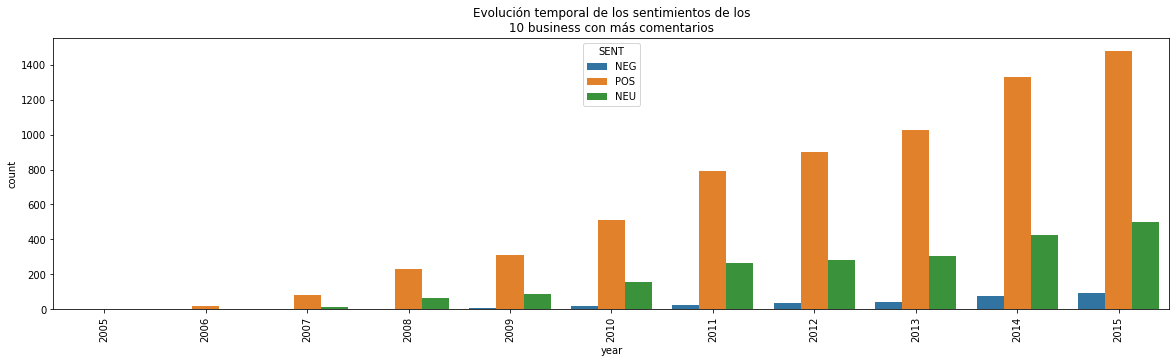

In [ ]:
fig = plt.figure(figsize=(20,5))
ax = plt.axes()
ax = sns.countplot(x=df_business_final['year'], hue=df_business_final.SENT)
plt.xticks(rotation=90)
plt.title(f'Evolución temporal de los sentimientos de los\n 10 business con más comentarios ')
plt.show()

**Analizamos la evolucion de los SENT durante los años para el negocio con más comentarios**

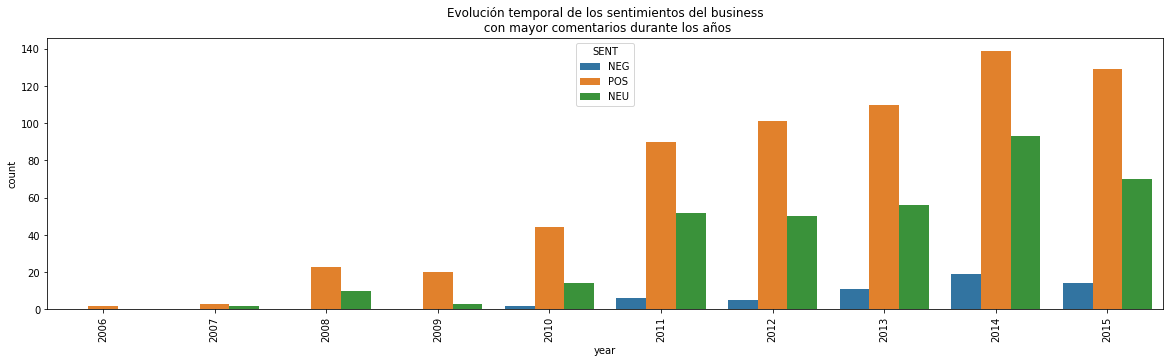

In [ ]:
fig = plt.figure(figsize=(20,5)) 
ax = plt.axes()
ax = sns.countplot(x = df_business_final[df_business_final['business_id']=='3Q0QQPnHcJuX1DLCL9G9Cg'].year, hue=df_business_final.SENT)
plt.xticks(rotation=90)
plt.title(f'Evolución temporal de los sentimientos del business\n con mayor comentarios durante los años')
plt.show()

##Keywords

Obtenemos las keywords según los 10 business con más comentarios

In [ ]:
df_copy.business_id.value_counts().sort_values(ascending=False).iloc[:10]

3Q0QQPnHcJuX1DLCL9G9Cg    1068
mpDxBBGywUE6GRRKja3sBA     527
NeUf9FyCCIN4MEseNyqkXQ     387
jTGQUWGIVvL-aY03C5BEmw     292
NTfUFk8GyOLL1uPbEO-pVg     250
XmdTkxKyJd7TuDLoiic1kg     249
2X5G4Ujq0s4Wfn4TC7gX0g     243
vgXE1I7c9ElcfYyZfQiN1Q     243
2SwC8wqpZC4B9iFVTgYT9A     239
rgmptwPbBH1wLpiBHcbIhA     221
Name: business_id, dtype: int64

In [ ]:
!pip install transformers
!pip install sentence_transformers
!pip install keybert
!pip install bertopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 40.3 MB/s 
     |████████████████████████████████| 596 kB 67.1 MB/s 
     |████████████████████████████████| 101 kB 15.0 MB/s 
     |████████████████████████████████| 6.6 MB 64.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 5.2 MB/s 
     |████████████████████████████████| 1.2 MB 56.8 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=2cb20e61ca5df1507d5e5edd879298f9534be58cdc776e2dc4729983c2391dfe
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built 

In [ ]:
from keybert import KeyBERT

kw_model = KeyBERT() #instanciamos

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

###General

In [ ]:
df_keywords=df_business_final[['business_id','text','SENT']]
df_keywords

,business_id,text,SENT
0,McikHxxEqZ2X0joaRNKlaw,horrible beer horrible service horrible menu,NEG
1,McikHxxEqZ2X0joaRNKlaw,summary area well suggestion come beer appetizer good decent beer original pretzel appetizer chunk soft pretzel dunk spinach cheese dip huge portion leftover rb appetizer sampler multi story way food handle half order rib look like rack attentive service quick seating frequent drink water refill amusing bad lot food choice burger steak chicken salad lot drink choice beer wine mixed drink guess see good take pick awesome tell right away distinguish place food super awesome awful stand way well beer appetizer well main course plenty brewery kind dead monday night place come want bar food expectation low,POS
2,McikHxxEqZ2X0joaRNKlaw,big fan rock dish money appetizer seared ahi spinach artichoke dip entree fire steak pub tips chicken fried chicken desert carrot cake die bar food pizza ball park pretzel spray brown ale half menu good half great beer good ask sampler usually velvet cask ask look different scotch ale ipa whiskey stout specialty depend mood brewer matt mood grumpy andy work sure molly great cocktail area head sing sing dinner wrap work year ago point hit rb possibly charlotte rock,NEU
3,McikHxxEqZ2X0joaRNKlaw,think place pretty decent friend reel thanksgive dinner order salad huge tasty like salad slather way dress friend slathered dig order chip guacamole guac pretty good friend enjoy beer enjoy coke know lame yeah bad good okay,POS
4,McikHxxEqZ2X0joaRNKlaw,microbrewe beer plus well beer drink waitress try split upright macrobrew trendy describe beer kind like coors light want coors pay half food actually save grace pretty good head door sing sing drink,POS
...,...,...,...
9094,p_HFt0I92MHDNPWvdtyEBA,tilapia burrito good waitress nice ready ask big beer huge chip give tasty place fancy look appealing food totally worth especially neighborhood well mexican food recommend probably go definitely good experience,POS
9095,p_HFt0I92MHDNPWvdtyEBA,al pastor tacos delicious awesome food great price definitely come town,POS
9096,p_HFt0I92MHDNPWvdtyEBA,take daughter visit dc discover jewel restaurant order margarita quest chip salsa immediately know authentic clean frill friendly stomp sphere taco al pastor chilies poblano absolutely delicious visit vicinity airport minute away,POS
9097,p_HFt0I92MHDNPWvdtyEBA,impress definitely recommend waste money bland presentation sloppy hate eat taco bell disappointed,NEG


In [ ]:
%%time
df_keywords["KEYWORDS"] = df_keywords.text.apply(lambda x: kw_model.extract_keywords(x, top_n=3, keyphrase_ngram_range=(1,1)))

CPU times: user 26min 44s, sys: 10min 36s, total: 37min 21s
Wall time: 25min 39s


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_keywords["KEYWORDS"] = df_keywords.KEYWORDS.apply(lambda keywords: [k[0] for k in keywords])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_keywords.sample(10)

,business_id,text,SENT,KEYWORDS
6102,n9iK0s1dKxv5JLi3u1eTkQ,see place highway time figure location charlotte mean busch league pleasantly surprised actually pretty legit theme park own cedar fair good news go cedar point sandusky oh good rub good selection quality coaster go scarowinds halloween theme reasonably price course parking food drink park ridiculously price line go ok vary minute old wooden coaster later night long time intimidator worth wait pleasant surprise worth trip find good deal,POS,"[park, parking, charlotte]"
870,2Igiyhi82R8_QaaPplRmCw,little biased live close love dor stop great typical greasy spoon diner special shot,POS,"[diner, spoon, dor]"
3694,yWVY1Bq19lDxu3BP7_96EQ,prantl favorite bakery live pittsburgh life get birthday cake decade worth cake prantl place heart change ownership bakery go downhill bit obvious increase price great place baked good try burn almond torte,POS,"[bakery, prantl, baked]"
6318,eaqJQP6bp7rQJQt5KqfvxQ,terribly impressed blue service generally good count get need want deliver smile promptly ambiance pretty good manage achieve flashy modern ish look remain understate food drink place fall short special blue strike pricey eclectic american restaurant problem especially charlotte have place like blue sling par course mean restaurant scene town innovative mean hard blue cornerstone uptown restaurant think shoulder large share responsibility look menu old old calamari olive sundried tomato scallop wrap prosciutto steak seafood blah blah blah dessert molten chocolate cake shit charlie hey blue call want fucking dessert check dessert number sub par chain restaurant sure blue well simply inspire applaud blue have seasonal menu venison loin american red snapper list gluten free option show pay attention current trend dietary need menu tired generally boring drink okay wine list highlight glass selection high quality comprehensive mixed drink look promise unfortunately live quality description indicate order fig sidecar poorly mixed friend impressed new fashioned cool place serve classic drink entree think blue fit bill strongly believe greatly improve uptown restaurant scene push envelope food drink selection,NEU,"[restaurant, entree, steak]"
8878,eThu9hCL8NOjOxswQ-cFSg,bad rental experience life computer write rental agreement hand wait hour process rental line long concession offer got chevy piece junk aveo talk tin wheel transmission sound horrible grind sound feel vibration certain speed gear barely power hill maintain highway speed time avis hertz,NEU,"[rental, gear, junk]"
8509,UzMMpUFwJhwUkHOyeXeWsQ,oph handful time year service food pretty consistent yo son typically get type pancake like chocolate chip husband get omelet split enormous recent visit chorizo omelet good chorizo pepper onion cheese salsa green black olive salsa bit odd taste ok sour cream enormous omelet come pancake opt home fry instead coffee ok bit strong acceptable service friendly attentive major downside long wait weekend early visit morning night freeze rain restaurant busy crazy busy walk right get open table score price bit high breakfast chorizo omelet potato consistent breakfast place south park area,NEU,"[breakfast, restaurant, food]"
7082,jTGQUWGIVvL-aY03C5BEmw,husband fly charlotte wedding week ago lucky spot place lunch weekend share chicken diane mushrooms garlic butter green onion parsley queen magic spice sautéed moderately spiced serve rice bignets dessert brunch menu love food order plate definitely share service friendly fast charlotte area definitely plan come,POS,"[wedding, charlotte, lunch]"
1134,2X5G4Ujq0s4Wfn4TC7gX0g,absolutely love place love regent square cut place perfect place night beer night boyfriend obsess create pack beer cave eat friday place pack got sit right away food come fast amazing specialty hummus day think chipotle ranch great sandwich portion huge leave hungry,POS,"[place, ranch, hummus]"
7389,3Q0QQPnHcJuX1DLCL9G9Cg,charlotte warm feel airport spacious tree chair pop ra

Analicemos la popularidad de las keywords encontradas para los 10 business_id con más comentarios

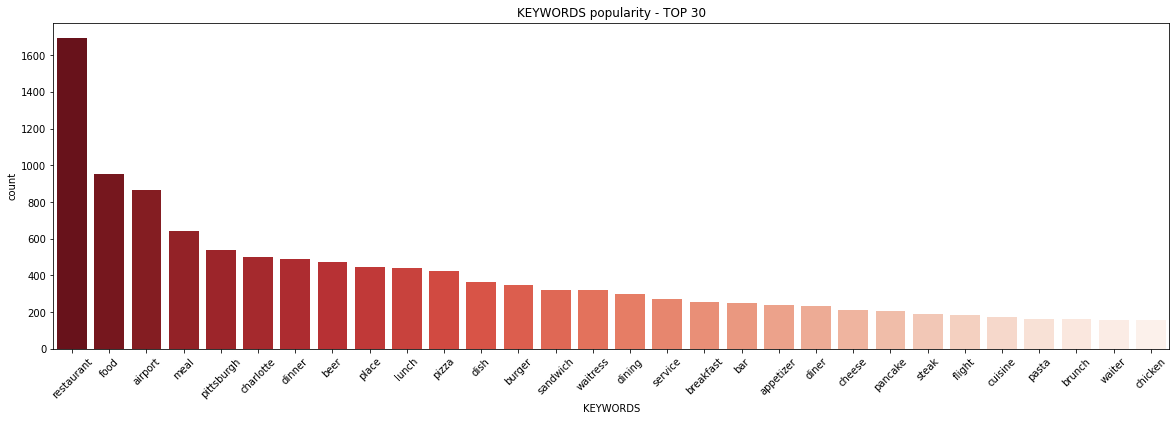

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,6))
sns.countplot(x=df_keywords.explode("KEYWORDS").KEYWORDS, 
              order=df_keywords.explode("KEYWORDS").KEYWORDS.value_counts().index[:30],
              palette='Reds_r')
plt.title("KEYWORDS popularity - TOP 30")
plt.xticks(rotation=45)
plt.show()

###Por sentimientos

####Negativos
Analicemos la popularidad de las keywords encontradas para los 10 business_id con más comentarios negativos.

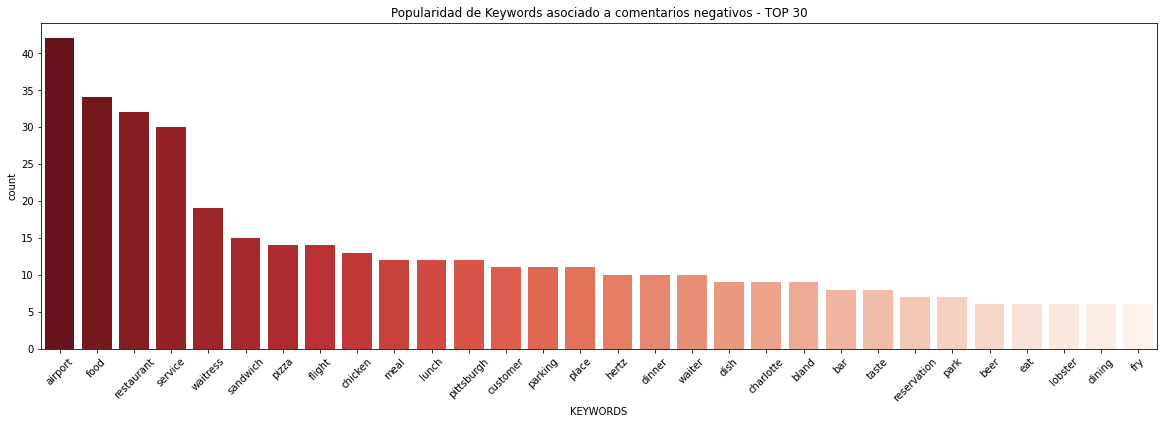

In [ ]:
plt.figure(figsize=(20,6))
sns.countplot(x=df_keywords[df_keywords['SENT'] == 'NEG'].explode("KEYWORDS").KEYWORDS, 
              order=df_keywords[df_keywords['SENT'] == 'NEG'].explode("KEYWORDS").KEYWORDS.value_counts().index[:30],
              palette='Reds_r')
plt.title("Popularidad de Keywords asociado a comentarios negativos - TOP 30")
plt.xticks(rotation=45)
plt.show()

####Positivos
Analicemos la popularidad de las keywords encontradas para los 10 business_id con más comentarios positivos.

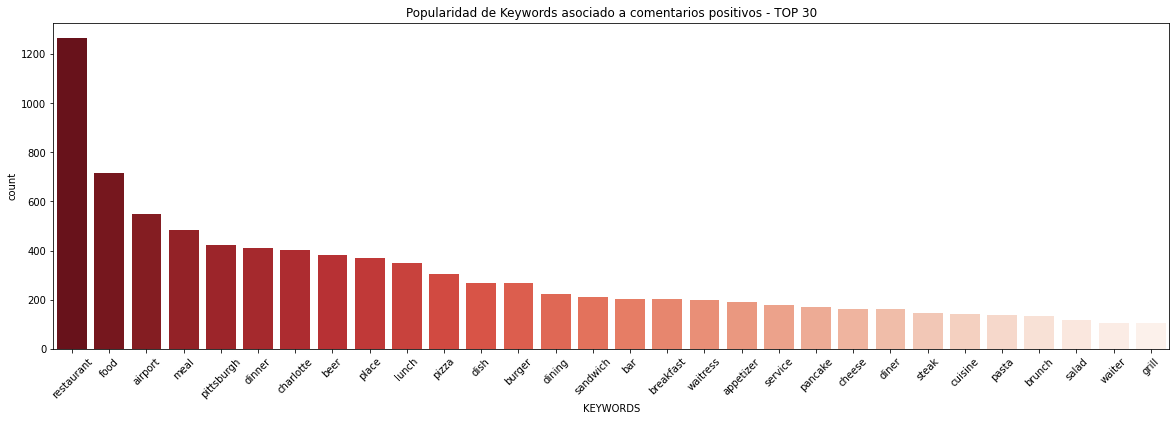

In [ ]:
plt.figure(figsize=(20,6))
sns.countplot(x=df_keywords[df_keywords['SENT'] == 'POS'].explode("KEYWORDS").KEYWORDS, 
              order=df_keywords[df_keywords['SENT'] == 'POS'].explode("KEYWORDS").KEYWORDS.value_counts().index[:30],
              palette='Reds_r')
plt.title("Popularidad de Keywords asociado a comentarios positivos - TOP 30")
plt.xticks(rotation=45)
plt.show()

## Tópicos

Obtenemos los tópicos según los 10 business con más comentarios

In [ ]:
from bertopic import BERTopic

In [ ]:
#!pip install bertopic[visualization]

In [ ]:
%%time
topic_model = BERTopic(calculate_probabilities=True, nr_topics=20, verbose=True)#ponemos un máximo de 20 tópicos
topics, probs = topic_model.fit_transform(df_keywords["text"].values)

Batches:   0%|          | 0/285 [00:00<?, ?it/s]

2022-07-23 21:00:59,376 - BERTopic - Transformed documents to Embeddings
/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)
2022-07-23 21:01:40,682 - BERTopic - Reduced dimensionality
2022-07-23 21:01:43,901 - BERTopic - Clustered reduced embeddings
2022-07-23 21:01:45,616 - BERTopic - Reduced number of topics from 78 to 21


CPU times: user 1min 13s, sys: 771 ms, total: 1min 14s
Wall time: 54.7 s


###General





In [ ]:
topics_data = topic_model.get_topic_info()
topics_data

,Topic,Count,Name
0,-1,4180,-1_good_food_place_great
1,0,1071,0_airport_flight_terminal_gate
2,1,456,1_pancake_breakfast_egg_pamela
3,2,376,2_sandwich_pittsburgh_primanti_fry
4,3,374,3_food_table_service_order
5,4,359,4_charlotte_cajun_food_great
6,5,227,5_dinner_good_restaurant_birthday
7,6,206,6_pizza_cheese_crust_beto
8,7,204,7_beer_selection_saucer_great
9,8,191,8_mac_mert_soul_cheese


In [ ]:
topic_model.get_topic_freq()

,Topic,Count
0,-1,4180
1,0,1071
2,1,456
3,2,376
4,3,374
5,4,359
6,5,227
7,6,206
8,7,204
10,8,191


Podemos seleccionar un tema específico y obtener las n palabras principales para ese tema y sus puntajes c-TF-IDF.

In [ ]:
topic_model.get_topic(0)

[('airport', 0.110934285075136),
 ('flight', 0.04486841141262172),
 ('terminal', 0.03187031372624953),
 ('gate', 0.030306158595419436),
 ('chair', 0.028321888951358513),
 ('fly', 0.02741754702616509),
 ('security', 0.026768576657968852),
 ('clean', 0.02664584310812004),
 ('charlotte', 0.025829155396560534),
 ('rock', 0.025370575985632967)]

In [ ]:
topic_model.get_topic(1)


[('pancake', 0.08652258923738754),
 ('breakfast', 0.06332839156546237),
 ('egg', 0.037764461736155885),
 ('pamela', 0.030801537631850045),
 ('diner', 0.028464551117129873),
 ('hotcake', 0.027887854439577267),
 ('toast', 0.02764438082227408),
 ('place', 0.025526226867108107),
 ('wait', 0.02504213979395385),
 ('good', 0.0245978791191776)]

El método visualiza_topics nos ayuda a visualizar temas generados con sus tamaños y palabras correspondientes.

In [ ]:
topic_model.visualize_topics()

El método visualize_barchart mostrará los términos seleccionados para algunos temas mediante la creación de gráficos de barras a partir de las puntuaciones de c-TF-IDF. Se puede comparar las representaciones de temas entre sí y obtener más información del tema generado.

In [ ]:
topic_model.visualize_barchart()

En el gráfico anterior, puede ver que las palabras principales en el Tema $4$ son beer, selection, great, saucer y good.

Podemos visualizar qué tan similares son ciertos temas entre sí por medio de un heatmap

In [ ]:
topic_model.visualize_heatmap()


Por ejemplo, el tópico $5$ y $10$ tienen una puntuación de similitud de $0.8846933$

###Por sentimientos

#### Positivos
Obtenemos los tópicos según los 10 business con más comentarios asociados a sentimientos positivos

In [ ]:
topic_model_sent_pos = BERTopic(calculate_probabilities=True, nr_topics=20, verbose=True)
topics, probs = topic_model_sent_pos.fit_transform(df_keywords[df_keywords['SENT'] == 'POS']['text'].values)

Batches:   0%|          | 0/209 [00:00<?, ?it/s]

2022-07-23 21:01:58,400 - BERTopic - Transformed documents to Embeddings
2022-07-23 21:02:15,587 - BERTopic - Reduced dimensionality
2022-07-23 21:02:17,461 - BERTopic - Clustered reduced embeddings
2022-07-23 21:02:18,761 - BERTopic - Reduced number of topics from 68 to 21


In [ ]:
topics_data_sent_pos = topic_model_sent_pos.get_topic_info()
topics_data_sent_pos

,Topic,Count,Name
0,-1,2996,-1_good_food_great_place
1,0,681,0_airport_flight_chair_clean
2,1,348,1_pancake_breakfast_egg_pamela
3,2,312,2_beer_great_selection_place
4,3,308,3_sandwich_pittsburgh_primanti_fry
5,4,281,4_order_restaurant_good_dish
6,5,262,5_charlotte_place_food_restaurant
7,6,167,6_mert_cornbread_soul_collard
8,7,157,7_german_beer_food_max
9,8,133,8_dog_beer_hot_cave


In [ ]:
topic_model_sent_pos.get_topic_freq()
#el tópico -1 es considerado outlier

,Topic,Count
0,-1,2996
1,0,681
2,1,348
3,2,312
4,3,308
5,4,281
6,5,262
7,6,167
8,7,157
9,8,133


In [ ]:
topic_model_sent_pos.visualize_barchart()
#tópico -1 es considerado outlier

In [ ]:
topic_model_sent_pos.visualize_heatmap()

In [ ]:
topic_model_sent_pos.visualize_topics()

#### Negativos
Obtenemos los tópicos según los 10 business con más comentarios asociados a sentimientos negativos

In [ ]:
topic_model_sent_neg = BERTopic(calculate_probabilities=True, nr_topics=20, verbose=True)
topics, probs = topic_model_sent_neg.fit_transform(df_keywords[df_keywords['SENT'] == 'NEG']['text'].values)

Batches:   0%|          | 0/10 [00:00<?, ?it/s]

2022-07-23 21:02:22,354 - BERTopic - Transformed documents to Embeddings
2022-07-23 21:02:26,437 - BERTopic - Reduced dimensionality
2022-07-23 21:02:26,465 - BERTopic - Clustered reduced embeddings
2022-07-23 21:02:26,509 - BERTopic - Reduced number of topics from 4 to 4


In [ ]:
topics_data_sent_neg = topic_model_sent_neg.get_topic_info()
topics_data_sent_neg

,Topic,Count,Name
0,-1,13,-1_hotel_parking_park_customer
1,0,224,0_food_bad_order_service
2,1,22,1_car_hertz_line_rental
3,2,55,2_airport_flight_time_bad


In [ ]:
topic_model_sent_neg.get_topic_freq()

,Topic,Count
0,0,224
1,2,55
2,1,22
3,-1,13


In [ ]:
topic_model_sent_neg.visualize_barchart()
#topico -1 es considerado outlier

In [ ]:
topic_model_sent_neg.visualize_heatmap()

In [ ]:
topic_model_sent_neg.visualize_topics() #tira error porque no hay tópicos para clausterizar?

/usr/local/lib/python3.7/dist-packages/scipy/sparse/linalg/eigen/arpack/arpack.py:1595: RuntimeWarning:

k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.



TypeError: ignored